### Importing necessary libraries

In [105]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib.image import imread
from sklearn.metrics import accuracy_score

In [106]:
total_classes = len(os.listdir('Train'))

print("Number of classes:", total_classes)

Number of classes: 43


In [107]:
# According to https://www.iamexpat.de/expat-info/driving-germany/road-signs

class_names = {0 : "Speed limit (20 km/h)",
            1 : "Speed limit (30 km/h)",
            2 : "Speed limit (50 km/h)",
            3 : "Speed limit (60 km/h)",
            4 : "Speed limit (70 km/h)",
            5 : "Speed limit (80 km/h)",
            6 : "End of speed limit (80 km/h)",
            7 : "Speed limit (100 km/h)",
            8 : "Speed limit (120 km/h)",
            9 : "No passing",
            10 : "No passing for vehicles over 3,5 tonnes",
            11 : "Priority",
            12 : "Priority road",
            13 : "Yield",
            14 : "Stop",
            15 : "Road closed",
            16 : "Vehicles over 3,5 tonnes prohibited",
            17 : "Do not enter",
            18 : "General danger",
            19 : "Curve (left)",
            20 : "Curve (right)",
            21 : "Double curve",
            22 : "Uneven road surface",
            23 : "Slippery when wet or dirty",
            24 : "Road narrows",
            25 : "Roadworks",
            26 : "Traffic signals ahead",
            27 : "Pedestrian crossing",
            28 : "Watch for children",
            29 : "Bicycle crossing",
            30 : "Ice / snow",
            31 : "Wild animal crossing",
            32 : "End of all restrictions",
            33 : "Turn right ahead",
            34 : "Turn left ahead",
            35 : "Ahead only",
            36 : "Ahead or turn right only",
            37 : "Ahead or turn left only",
            38 : "Pass by on right",
            39 : "Pass by on left",
            40 : "Roundabout",
            41 : "End of no passing zone",
            42 : "End of no passing zone for trucks"}

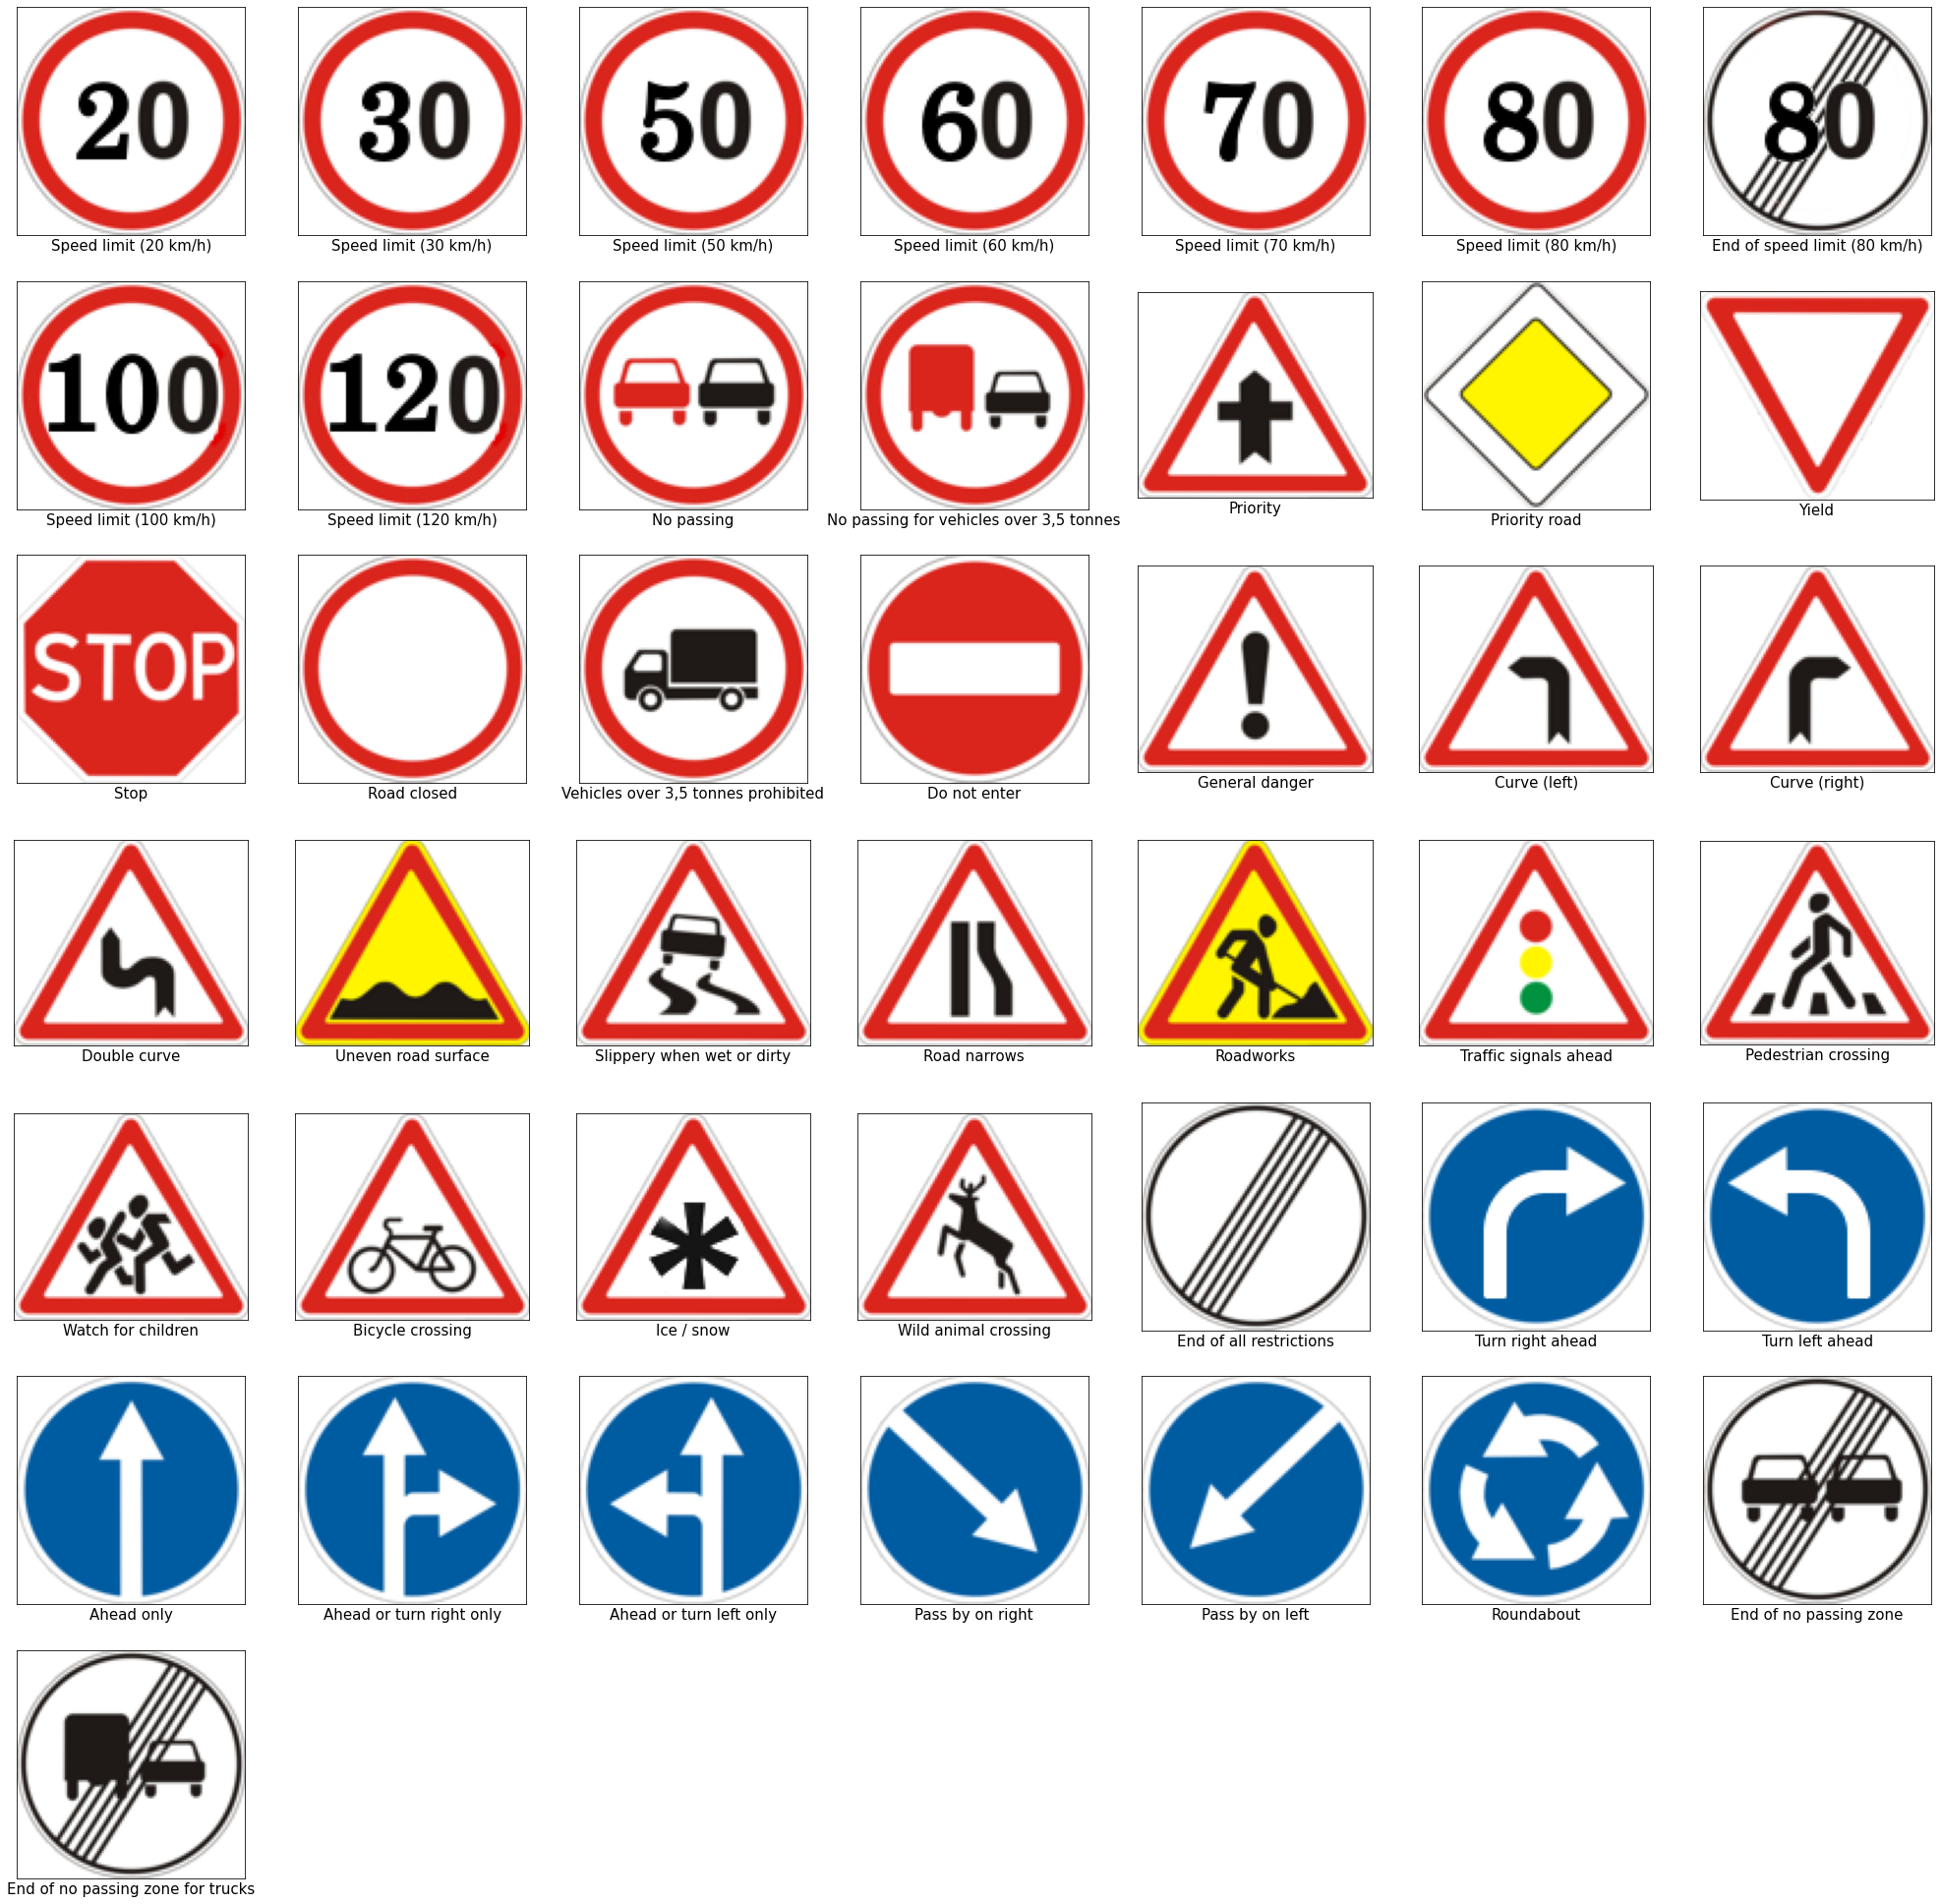

In [108]:
plt.figure(figsize=(35,35), facecolor='white')

for i in range(1,44):
    plt.subplot(7,7,i)
    image = imread('Meta' + '/' + str(i-1)+'.png') 
    plt.imshow(image)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlabel(class_names[i-1], fontsize = 15)

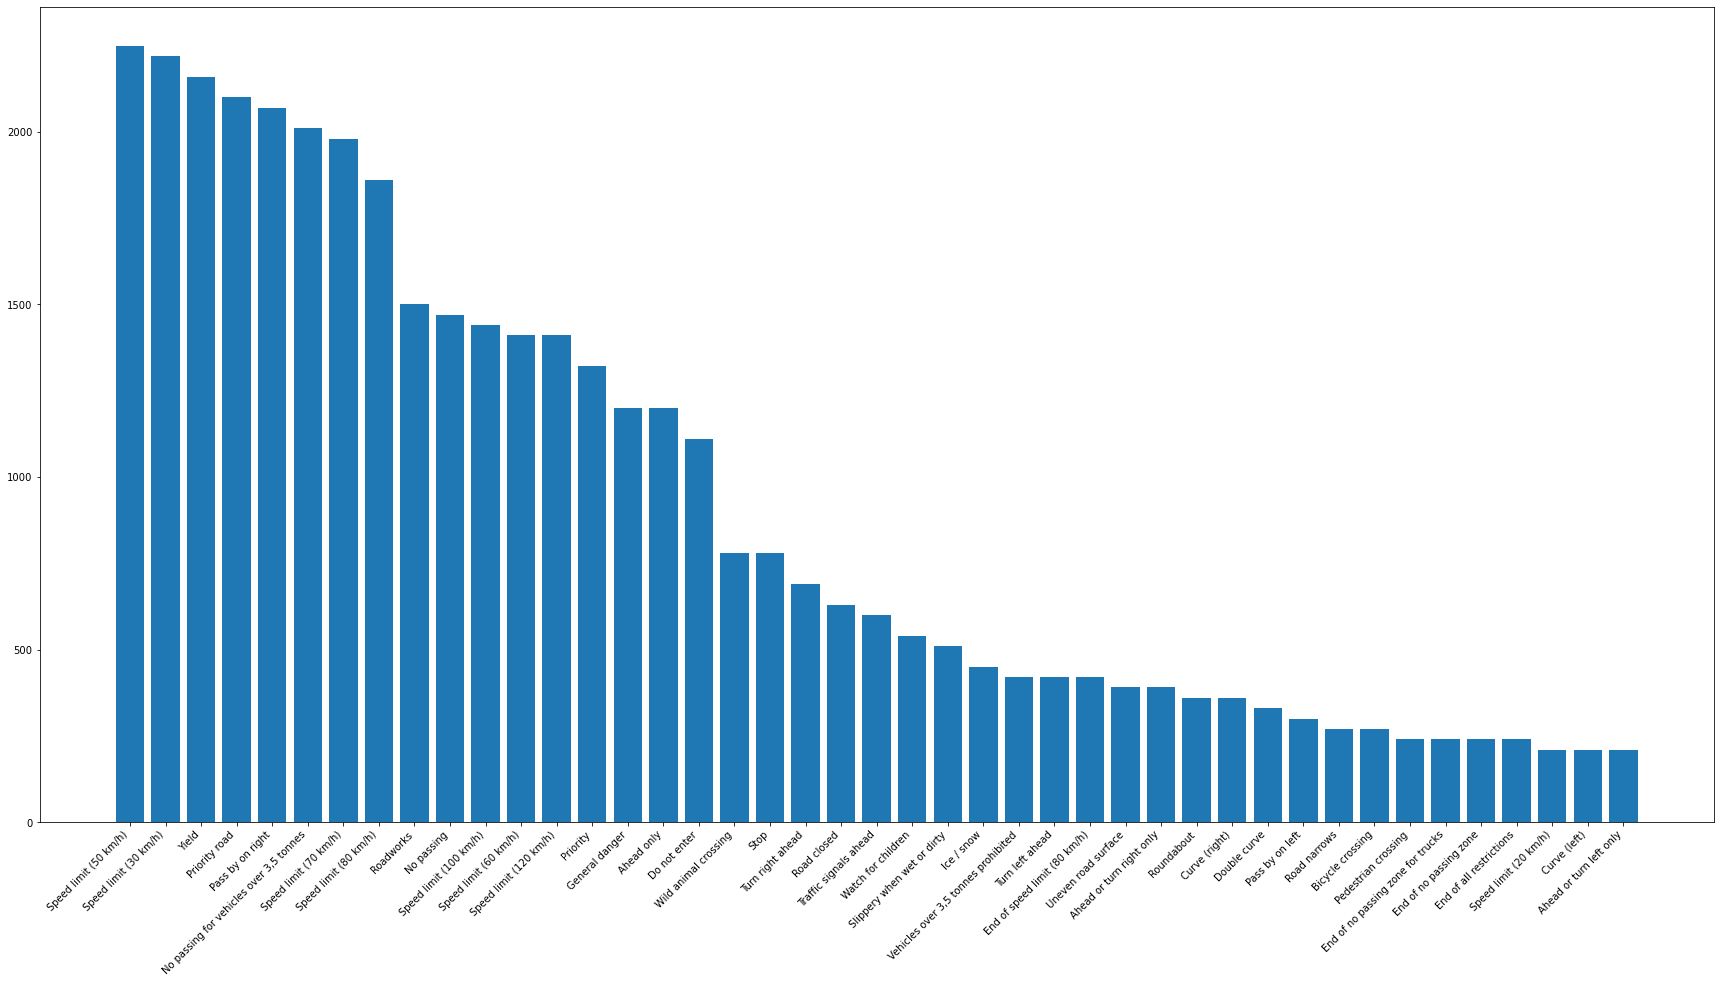

In [109]:
folders = os.listdir('Train')

amount_of_elements = []
class_name = []

for folder in folders:
    amount_of_elements.append(len(os.listdir('Train' + '/' + folder)))
    class_name.append(class_names[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(amount_of_elements, class_name)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
amount_of_elements, class_name = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class
plt.figure(figsize=(30,15))  
plt.bar(class_name, amount_of_elements)
plt.xticks(class_name, rotation=45, horizontalalignment = 'right')
plt.show()

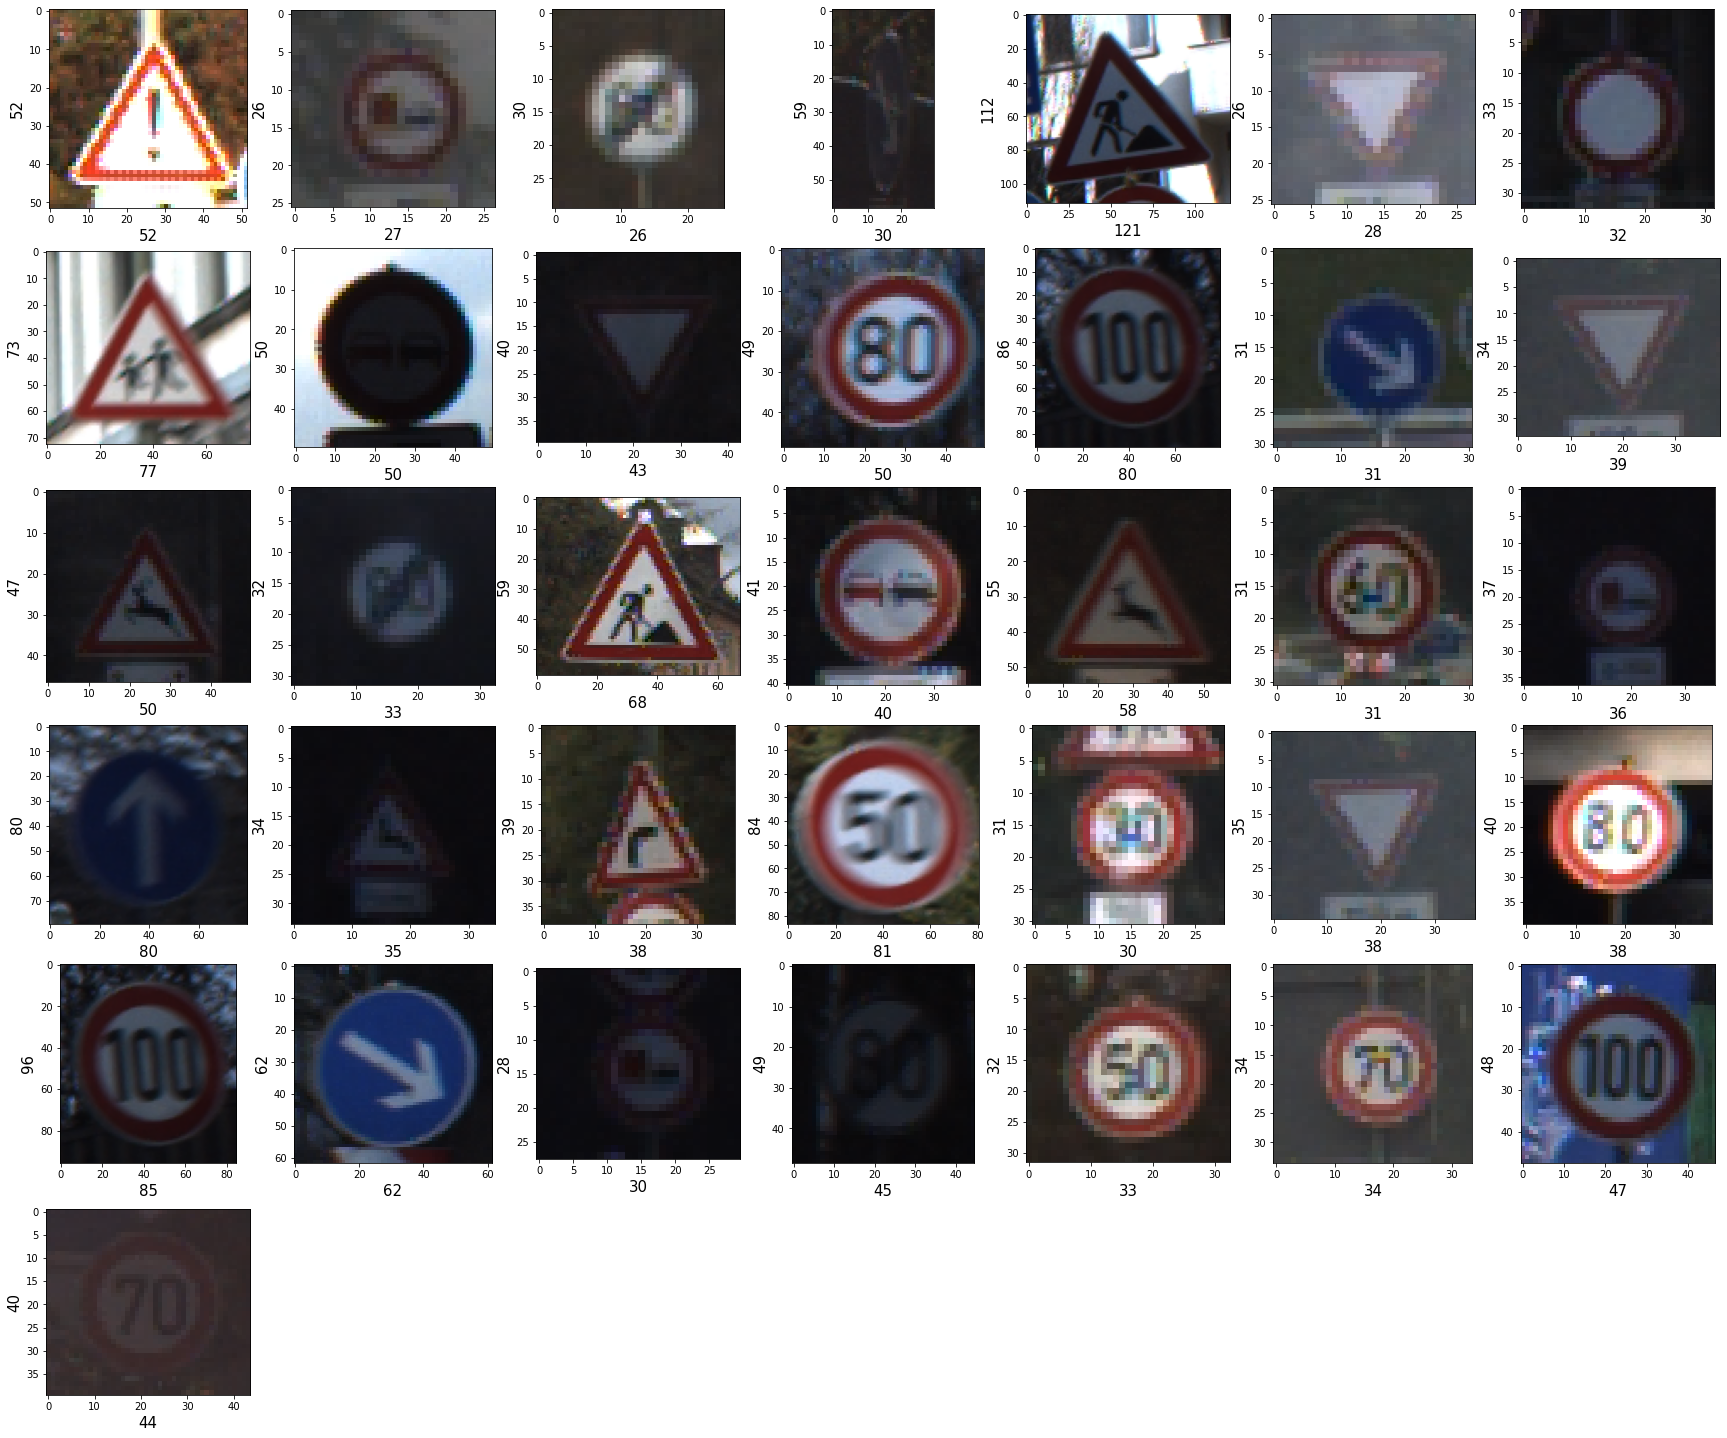

In [110]:
# Visualizing 36 random images from test data
import random
from matplotlib.image import imread

plt.figure(figsize=(30,30), facecolor='white')

for i in range(1,37):
    plt.subplot(7,7,i)
    files = os.listdir('Test')
    image = imread('Test' + '/' + random.choice(files))

    plt.imshow(image)
    plt.xlabel(image.shape[1], fontsize = 15)
    plt.ylabel(image.shape[0], fontsize = 15)

In [111]:
image_data = []
image_labels = []

for i in range(total_classes):
    path = 'Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        image = cv2.imread(path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((32, 32))
        image_data.append(np.array(resize_image))
        image_labels.append(i)
        
# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [112]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [113]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [114]:
model = models.Sequential([    
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    
    layers.Dense(43, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 128)        

In [115]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
858/858 [==============================] - 50s 59ms/step - loss: 0.3608 - accuracy: 0.9074 - val_loss: 0.0504 - val_accuracy: 0.9843
Epoch 2/10
858/858 [==============================] - 52s 61ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0555 - val_accuracy: 0.9831
Epoch 3/10
 76/858 [=>............................] - ETA: 42s - loss: 0.0316 - accuracy: 0.9901

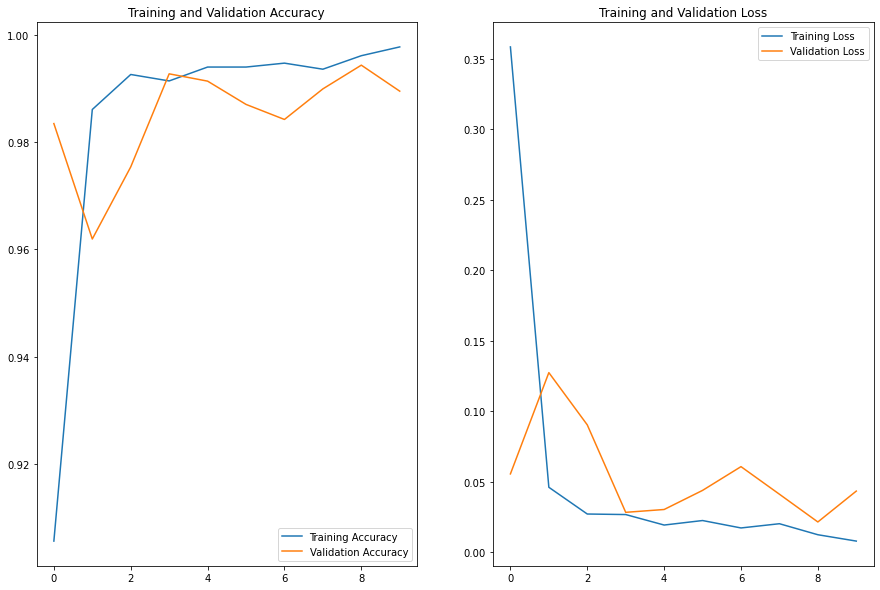

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test = pd.read_csv('Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    image = cv2.imread(img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((32, 32))
    data.append(np.array(resize_image))
    
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred))

Test Data accuracy:  0.9565320665083136
